<a href="https://colab.research.google.com/github/kabirspidy1020/loan_eligibility_prediction-predictive-data-analysis-/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn import svm

In [7]:
df=pd.read_csv("/content/Copy of loan.csv")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.shape

(614, 13)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

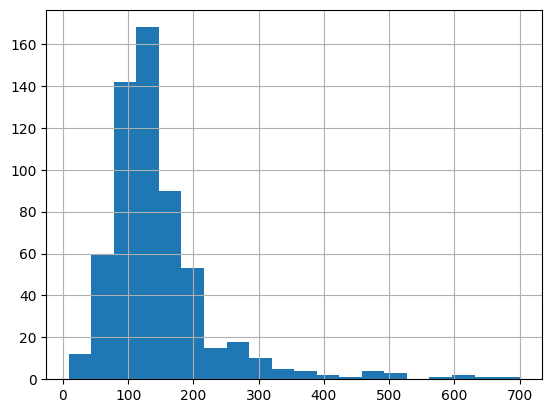

In [12]:
df["LoanAmount"].hist(bins=20)

<Axes: >

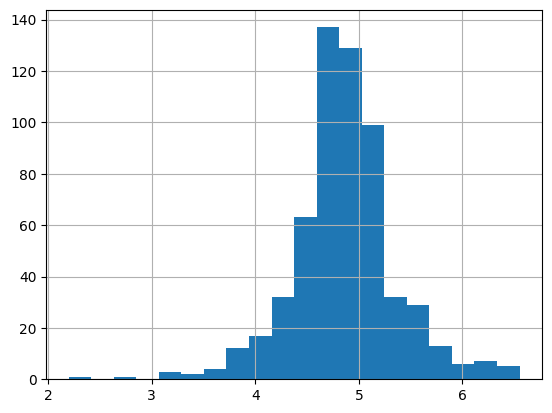

In [13]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

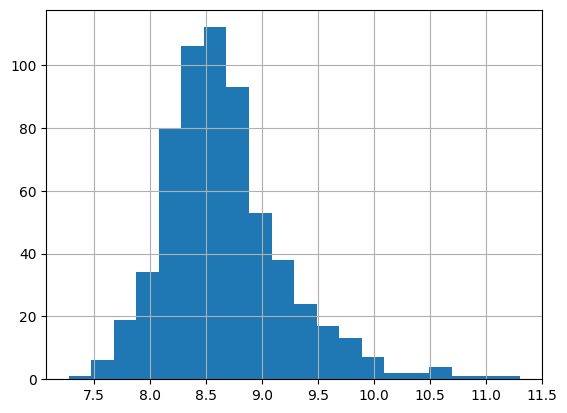

In [15]:
df["Total_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["Total_income_log"]=np.log(df["Total_income"])
df["Total_income_log"].hist(bins=20)

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace= True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(), inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)
df.isnull().sum()






Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_income         0
Total_income_log     0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

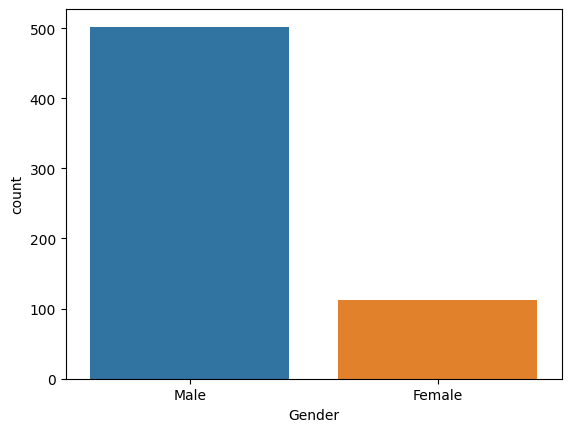

In [17]:
sns.countplot(x=df['Gender'], data=df)

<Axes: xlabel='Married', ylabel='count'>

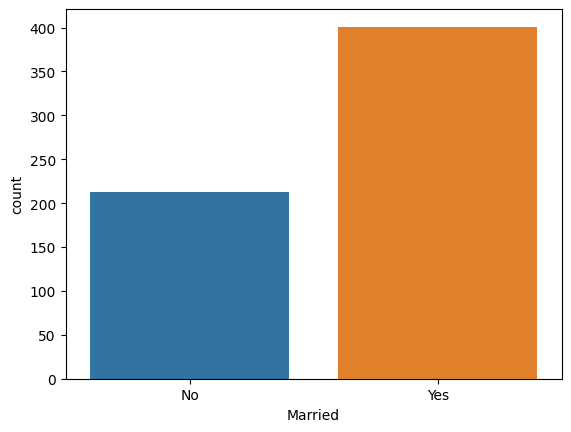

In [18]:
sns.countplot(x=df['Married'], data=df)

<Axes: xlabel='Dependents', ylabel='count'>

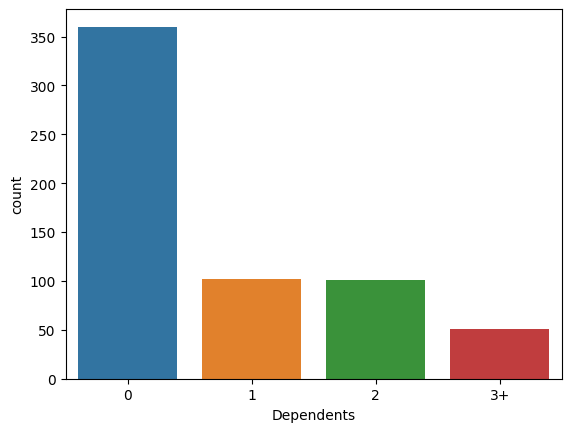

In [19]:
sns.countplot(x=df['Dependents'], data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

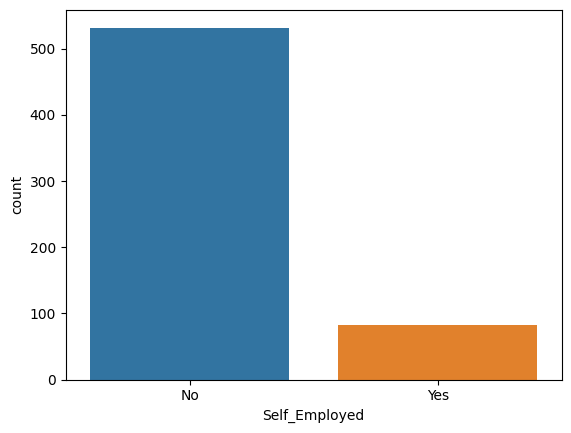

In [20]:
sns.countplot(x=df['Self_Employed'], data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

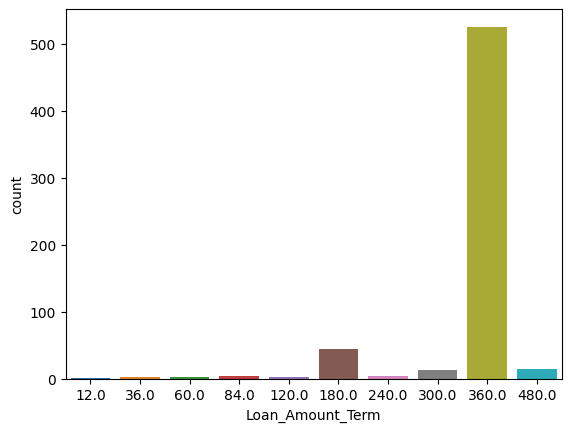

In [21]:
sns.countplot(x=df['Loan_Amount_Term'], data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

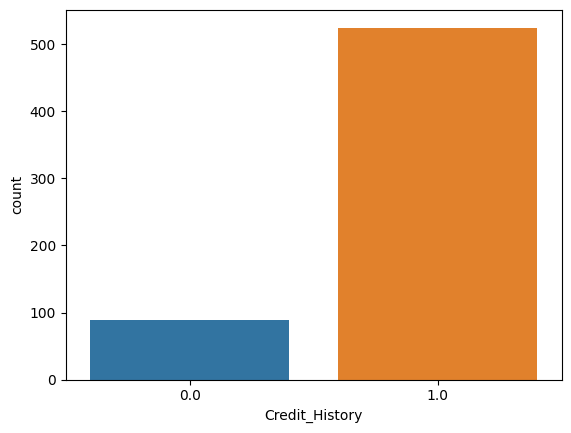

In [22]:
sns.countplot(x=df['Credit_History'], data=df)

In [23]:
X=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
print(X)

[['Male' 'No' '0' ... 1.0 4.857444178729352 5849.0]
 ['Male' 'Yes' '1' ... 1.0 4.852030263919617 6091.0]
 ['Male' 'Yes' '0' ... 1.0 4.189654742026425 3000.0]
 ...
 ['Male' 'Yes' '1' ... 1.0 5.53338948872752 8312.0]
 ['Male' 'Yes' '2' ... 1.0 5.231108616854587 7583.0]
 ['Female' 'No' '0' ... 0.0 4.890349128221754 4583.0]]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [25]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [32]:
for i in range(5):
  X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])

In [33]:
X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])

In [34]:
print(X_train)

[[1 1 0 ... 1.0 4.875197323201151 267]
 [1 0 1 ... 1.0 5.278114659230517 407]
 [1 1 0 ... 0.0 5.003946305945459 249]
 ...
 [1 1 3 ... 1.0 5.298317366548036 363]
 [1 1 0 ... 1.0 5.075173815233827 273]
 [0 1 0 ... 1.0 5.204006687076795 301]]


In [35]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)


In [36]:
print(y_train)

[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1]


In [37]:
for i in range(5):
  X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])
X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

In [38]:

y_test=labelencoder_y.fit_transform(y_test)

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [43]:
from sklearn import metrics
print("The accuracy of decision tree is", metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree is 0.7073170731707317


In [44]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [46]:
print("The accuracy of Naive bayes is", metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive bayes is 0.8292682926829268
